<a href="https://colab.research.google.com/github/ruddypp/uas-machinelearning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np

# Membaca dataset
nama_file = list(uploaded.keys())[0]
data = pd.read_csv(nama_file)

# Memastikan dataset memiliki lebih dari 1000 baris dan tipe data campuran
assert len(data) >= 1000, "Dataset harus memiliki minimal 1000 baris"
data.head()

Saving weatherHistory.csv to weatherHistory.csv


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#import Library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Menampilkan Informasi dataset
print("Informasi dataset:")
data.info()
# mengubah menjadi statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

Statistik deskriptif:
       Temperature (C)  App

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Data yang hilang:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


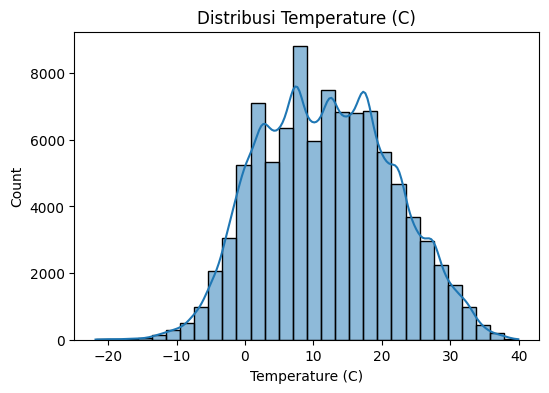

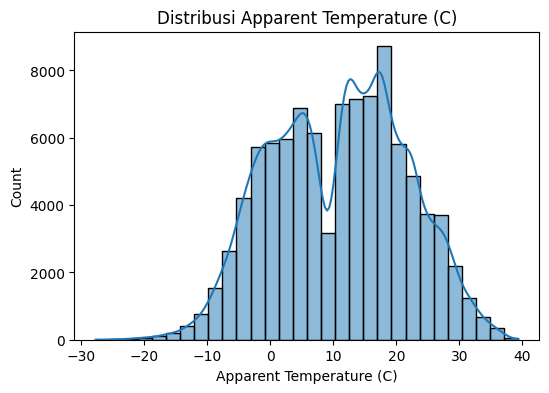

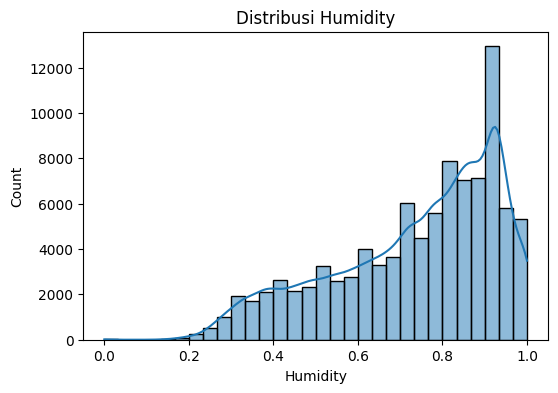

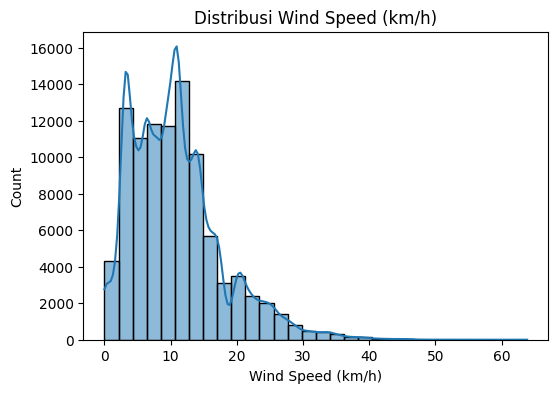

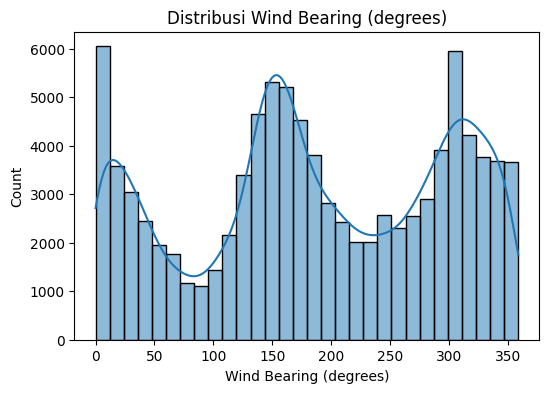

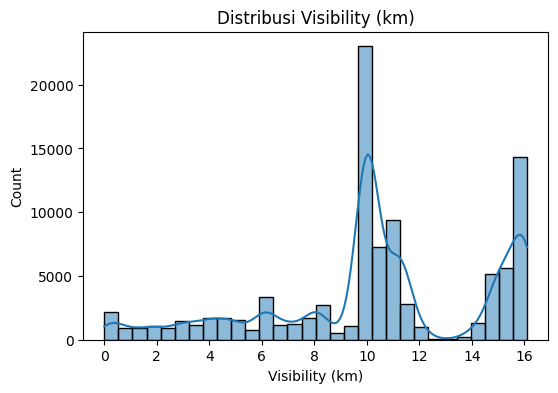

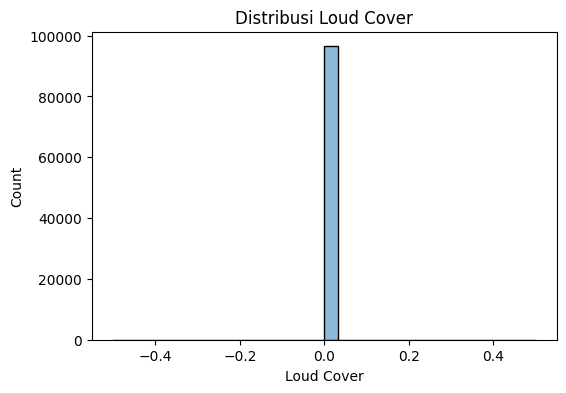

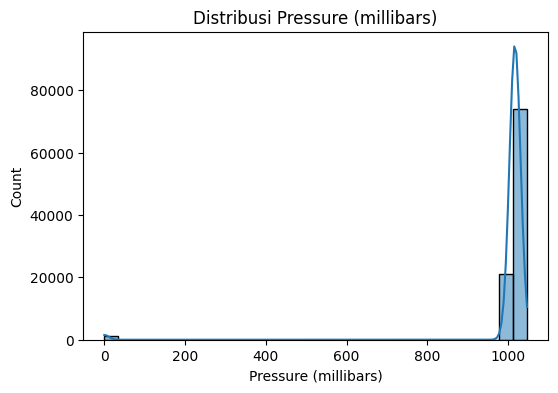

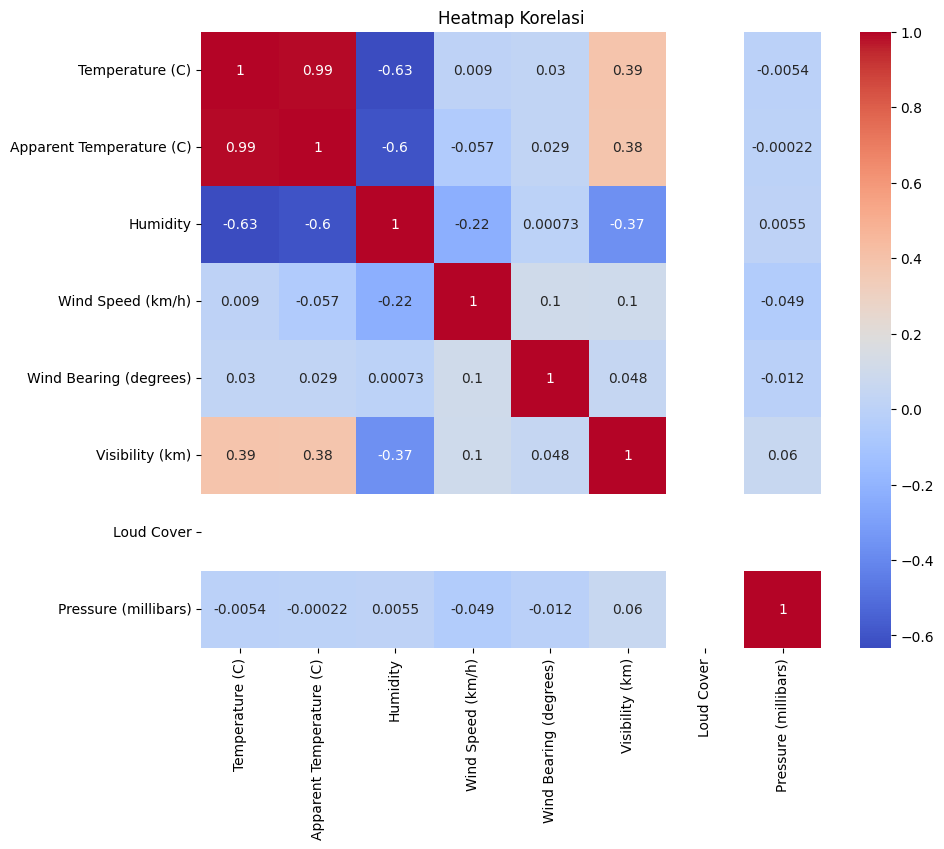

In [ ]:

# Memeriska apakah dataset ada yang hilang setelah ubah menjadi statistik deskriptif
print("\nData yang hilang:")
print(data.isnull().sum())

# Memvisualisasi data
kolom_numerik = data.select_dtypes(include=['float64', 'int64']).columns
for kolom in kolom_numerik:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[kolom], kde=True, bins=30)
    plt.title(f'Distribusi {kolom}')
    plt.show()


# menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
data_numerik = data.select_dtypes(include=['number'])
sns.heatmap(data_numerik.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:

# Bagian 5: Menangani nilai kosong dan encoding data
for kolom in kolom_numerik:
    data[kolom].fillna(data[kolom].median(), inplace=True)

kolom_kategorikal = data.select_dtypes(include=['object']).columns
label_encoders = {}
for kolom in kolom_kategorikal:
    le = LabelEncoder()
    data[kolom] = le.fit_transform(data[kolom])
    label_encoders[kolom] = le

scaler = StandardScaler()
data[kolom_numerik] = scaler.fit_transform(data[kolom_numerik])

print("Dataset setelah preprocessing:")
print(data.head())

<ipython-input-6-40bc36751f05>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[kolom].fillna(data[kolom].median(), inplace=True)


Dataset setelah preprocessing:
   Formatted Date  Summary  Precip Type  Temperature (C)  \
0            2159       19            0        -0.257599   
1            2160       19            0        -0.269814   
2            2161       17            0        -0.267487   
3            2162       19            0        -0.381489   
4            2163       17            0        -0.332631   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                 -0.324035  0.793470           0.478635   
1                 -0.339097  0.639996           0.499594   
2                 -0.138102  0.793470          -0.995473   
3                 -0.459071  0.486521           0.476306   
4                 -0.362469  0.486521           0.033841   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                0.591256         1.306976         0.0              0.101685   
1                0.665756         1.306976         0.0              0.105960   
2      

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

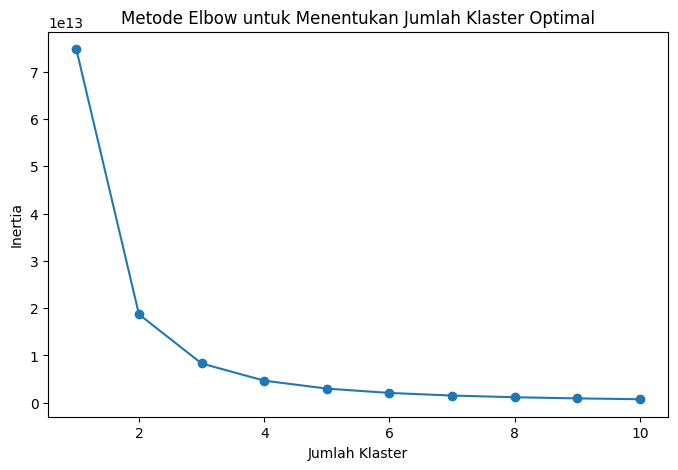

In [ ]:
#Menentukan jumlah klaster yang optimal dengan Elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

# Menentukan jumlah klaster optimal (misalnya k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
klaster = kmeans.fit_predict(data)
data['Klaster'] = klaster

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# mengevaluasi mode klastering
silhouette_avg = silhouette_score(data, klaster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5901588447344019


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

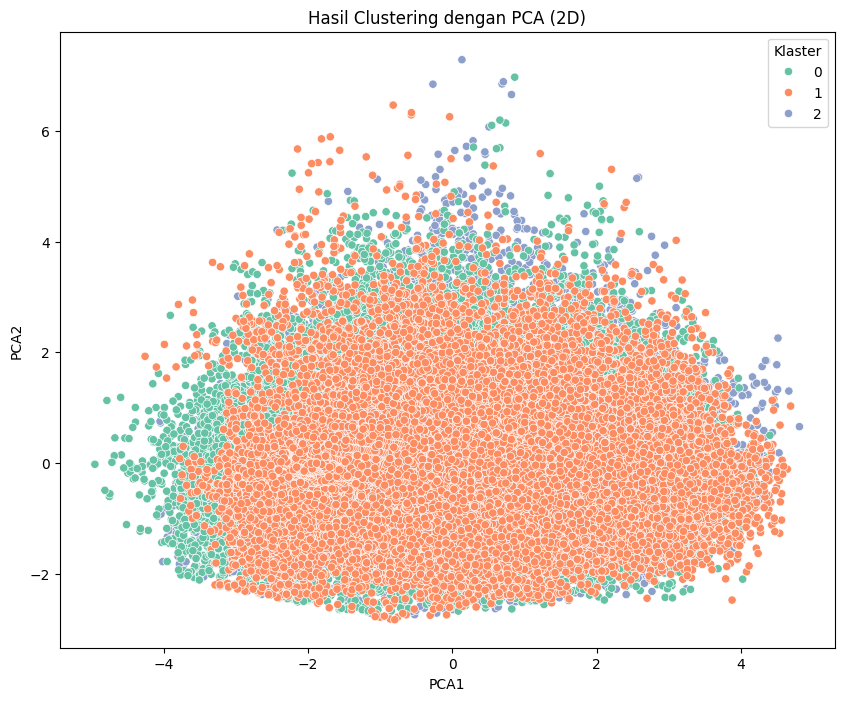

In [ ]:
# menampilkan visualisasi berbentuk 2d PCA
pca = PCA(n_components=2)
hasil_pca = pca.fit_transform(data[kolom_numerik])
data['PCA1'] = hasil_pca[:, 0]
data['PCA2'] = hasil_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Klaster', palette='Set2')
plt.title('Hasil Clustering dengan PCA (2D)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Menganalisis hasil klaster
print("\nInterpretasi Klaster:")
for klaster in range(k_optimal):
    print(f"Klaster {klaster}:")
    print(data[data['Klaster'] == klaster].mean())


Interpretasi Klaster:
Klaster 0:
Formatted Date              48063.118817
Summary                        15.880032
Precip Type                     0.162807
Temperature (C)                -0.106342
Apparent Temperature (C)       -0.108451
Humidity                        0.073849
Wind Speed (km/h)               0.021100
Wind Bearing (degrees)         -0.005936
Visibility (km)                -0.182727
Loud Cover                      0.000000
Pressure (millibars)            0.004029
Daily Summary                 124.317499
Klaster                         0.000000
PCA1                           -0.220278
PCA2                            0.013960
dtype: float64
Klaster 1:
Formatted Date              80284.500000
Summary                        16.338826
Precip Type                     0.089910
Temperature (C)                 0.093246
Apparent Temperature (C)        0.098146
Humidity                        0.040920
Wind Speed (km/h)              -0.036857
Wind Bearing (degrees)         -0.0314

Tulis hasil interpretasinya di sini.
1. Cluster 1:
Klaster 0:
Formatted Date              48063.118817
Summary                        15.880032
Precip Type                     0.162807
Temperature (C)                -0.106342
Apparent Temperature (C)       -0.108451
Humidity                        0.073849
Wind Speed (km/h)               0.021100
Wind Bearing (degrees)         -0.005936
Visibility (km)                -0.182727
Loud Cover                      0.000000
Pressure (millibars)            0.004029
Daily Summary                 124.317499
Klaster                         0.000000
PCA1                           -0.220278
PCA2                            0.013960
dtype: float64
2. Cluster 2:
Klaster 1:
Formatted Date              80284.500000
Summary                        16.338826
Precip Type                     0.089910
Temperature (C)                 0.093246
Apparent Temperature (C)        0.098146
Humidity                        0.040920
Wind Speed (km/h)              -0.036857
Wind Bearing (degrees)         -0.031418
Visibility (km)                 0.214199
Loud Cover                      0.000000
Pressure (millibars)            0.016019
Daily Summary                 129.388349
Klaster                         1.000000
PCA1                            0.160987
PCA2                           -0.059296
dtype: float64
3. Cluster 3:
Klaster 2:
Formatted Date              15998.500000
Summary                        15.796862
Precip Type                     0.112695
Temperature (C)                 0.012812
Apparent Temperature (C)        0.009988
Humidity                       -0.115530
Wind Speed (km/h)               0.015979
Wind Bearing (degrees)          0.037671
Visibility (km)                -0.032449
Loud Cover                      0.000000
Pressure (millibars)           -0.020215
Daily Summary                 134.243953
Klaster                         2.000000
PCA1                            0.058995
PCA2                            0.045799
dtype: float64

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
#Menyimpan hasil clustering
output_file = 'hasil_clustering.csv'
data.to_csv(output_file, index=False)

print(f"Hasil clustering disimpan ke: {output_file}")
files.download(output_file)

Hasil clustering disimpan ke: hasil_clustering.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>